<a href="https://colab.research.google.com/github/harshaharod21/Natural-Language-Processing/blob/main/NLP_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting started with NLP

We will be using both NLTK and spaCy library to perform NLP tasks

**When to use spaCy or NLTK?**
* For small-scale projects: If you’re working on a small-scale project that
doesn’t require complex NLP tasks, NLTK might be a good choice due to its flexibility and ease of use. You can easily customize and fine-tune NLTK to suit your needs, and its extensive documentation makes it easy to get started.
* For large-scale projects: If you’re working with large amounts of text and need to process it quickly, spaCy is the better choice due to its speed and efficiency. Its tokenization algorithm is also more efficient, making it suitable for processing complex sentences and non-standard text formats.
* For specialized tasks: If you need to perform more specialized NLP tasks such as sentiment analysis, text classification, or named entity recognition, spaCy might be the better choice due to its advanced features and pre-trained models.
* For multilingual projects: If you’re working with non-English text, NLTK is the better choice as it supports a wide range of languages.
* For research or educational purposes: NLTK is a popular choice among researchers and educators due to its flexibility, extensive documentation, and large community. It’s also a good choice if you want to build your models from scratch.


## Text Preprocessing - 1

In [ ]:
! pip install nltk

### Tokenisation

In [ ]:
corpus=""" I'm a student of Data Science.
 I study at IIT Ropar and IIM Amritsar,its a wonderful experience!
 """

In [ ]:
print(corpus)

 I'm a student of Data Science.
 I study at IIT Ropar and IIM Amritsar,its a wonderful experience!
 


In [6]:
#Tokenisation where we will convert paragraphs into sentences

from nltk.tokenize import sent_tokenize



In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
documents=sent_tokenize(corpus)

In [ ]:
#Tokenisation
#Convert paragraph/sentences into words

from nltk.tokenize import word_tokenize


In [ ]:
word_tokenize(corpus)

NameError: name 'word_tokenize' is not defined

In [ ]:
from nltk.tokenize import wordpunct_tokenize

In [ ]:
#treating punctuation as diiferent word
wordpunct_tokenize(corpus)

['I',
 "'",
 'm',
 'a',
 'student',
 'of',
 'Data',
 'Science',
 '.',
 'I',
 'study',
 'at',
 'IIT',
 'Ropar',
 'and',
 'IIM',
 'Amritsar',
 ',',
 'its',
 'a',
 'wonderful',
 'experience',
 '!']

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
tokenizer=TreebankWordTokenizer()

In [ ]:
#fullstop is not a seperate word
tokenizer.tokenize(corpus)

['I',
 "'m",
 'a',
 'student',
 'of',
 'Data',
 'Science.',
 'I',
 'study',
 'at',
 'IIT',
 'Ropar',
 'and',
 'IIM',
 'Amritsar',
 ',',
 'its',
 'a',
 'wonderful',
 'experience',
 '!']

## Stemming

In [ ]:
## eating,eat,eaten--->eat   go,going,gone---->go

In [ ]:
words=['go','goes','gone','goa','write','writing','written']


#### PorterStemmer

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemming=PorterStemmer()
for word in words:
  print(word+"--->"+stemming.stem(word))

#disadvantage can be seen below

go--->go
goes--->goe
gone--->gone
goa--->goa
write--->write
writing--->write
written--->written


### RegexpStemmer class

In [ ]:
from nltk.stem import RegexpStemmer

In [ ]:
reg_stem=RegexpStemmer('ing$|s$|e$|able$',min=4)

In [ ]:
reg_stem.stem('flys')

'fly'

### Snowball Stemmer

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
#supports a number of languages,somewhat better than porterstemmer

snow_stem=SnowballStemmer('english')

##Major disadvantage of stemming can be observed

### Lemmatization
It reduces word to its **root word** and not root stem by having access to dictionary

This method takes relatively more time

In [ ]:
#useful for q&a,chatbot,text summarisatiion

from nltk.stem import WordNetLemmatizer

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lem=WordNetLemmatizer()

In [ ]:
#POS-Noun:n,verb:v,adjective:a,adverd:r
lem.lemmatize('better',pos='a')

'good'

In [ ]:
for word in words:
  print(word+"--->"+lem.lemmatize(word,pos='v')) #by default pos='n'


go--->go
goes--->go
gone--->go
goa--->goa
write--->write
writing--->write
written--->write


### Stop Words

These are those words which are repetetive and not of much importance

In [3]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')
#it is good to create your own stopwords

In [ ]:
stemmer=PorterStemmer()


In [2]:
para="""So far, we have explored two different families of generative models that have both involved latent variables—variational autoencoders (VAEs) and generative adversarial networks (GANs). In both cases, a new variable is introduced with a distribution that is easy to sample from and the model learns how to decode this variable back into the original domain.

We will now turn our attention to autoregressive models—a family of models that simplify the generative modeling problem by treating it as a sequential process. Autoregressive models condition predictions on previous values in the sequence, rather than on a latent random variable. Therefore, they attempt to explicitly model the data-generating distribution rather than an approximation of it (as in the case of VAEs).
"""

In [9]:
sentences=nltk.sent_tokenize(para)

In [ ]:
#Apply stopwords and filter and then apply stemming

for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english')) ]
  sentences[i]=' '.join(words)

In [ ]:
sentences

['so far , explor two differ famili gener model involv latent variables—vari autoencod ( vae ) gener adversari network ( gan ) .',
 'in case , new variabl introduc distribut easi sampl model learn decod variabl back origin domain .',
 'we turn attent autoregress models—a famili model simplifi gener model problem treat sequenti process .',
 'autoregress model condit predict previou valu sequenc , rather latent random variabl .',
 'therefor , attempt explicitli model data-gener distribut rather approxim ( case vae ) .']

In [ ]:
#snowball making sure that all the letter become small

In [1]:
# using Lemmatizer

from nltk.stem import WordNetLemmatizer

lema=WordNetLemmatizer()


In [21]:
#better than stemming and snowball stemming

for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[lema.lemmatize(word.lower()) for word in words if word not in set(stopwords.words('english')) ]
  sentences[i]=' '.join(words)

In [22]:
sentences
# sentences are not in lowercase it can be changeed to lowercase

['so far , explore two different family generative model involve latent variables—variational autoencoders ( vaes ) generative adversarial network ( gans ) .',
 'in case , new variable introduce distribution easy sample model learn decode variable back original domain .',
 'we turn attention autoregressive models—a family model simplify generative model problem treat sequential process .',
 'autoregressive model condition prediction previous value sequence , rather latent random variable .',
 'therefore , attempt explicitly model data-generating distribution rather approximation ( case vaes ) .']

## Parts of Speech Tagging
We have used pos='n','v' or 'a'.This will help automatically categorize in different pos

In [26]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [23]:
paragraph=""" Are they right? Some of these benefits are probably overhyped. Claims that a new era of personalised AI care for individual animals is just around the corner should certainly be viewed with scepticism. On broiler farms, which farm chickens for meat, chickens are slaughtered by six weeks, whereas turkeys and pigs are usually killed by the age of five or six months. It is hard to imagine individualised AI-assisted care taking off in industries in which the individuals are so quickly replaced, and even harder to envisage this in fish farming. AI products in these industries will monitor large groups, tracking averages. In the dairy and beef industries, in which animals are raised or kept for several years, providing tailored care to individuals may be more plausible.
"""

In [24]:
sent_a=nltk.sent_tokenize(paragraph)

In [28]:
# lets find the Pos Tag

for i in range(len(sent_a)):
  words= nltk.word_tokenize(sent_a[i])
  words=[word for word in words if word not in set(stopwords.words('english')) ]
  poss_tag=nltk.pos_tag(words)
  print(poss_tag)

[('Are', 'NNP'), ('right', 'RB'), ('?', '.')]
[('Some', 'DT'), ('benefits', 'NNS'), ('probably', 'RB'), ('overhyped', 'VBD'), ('.', '.')]
[('Claims', 'NNP'), ('new', 'JJ'), ('era', 'NN'), ('personalised', 'VBN'), ('AI', 'NNP'), ('care', 'NN'), ('individual', 'JJ'), ('animals', 'NNS'), ('around', 'IN'), ('corner', 'NN'), ('certainly', 'RB'), ('viewed', 'VBD'), ('scepticism', 'NN'), ('.', '.')]
[('On', 'IN'), ('broiler', 'NN'), ('farms', 'NNS'), (',', ','), ('farm', 'NN'), ('chickens', 'NNS'), ('meat', 'NN'), (',', ','), ('chickens', 'NNS'), ('slaughtered', 'VBD'), ('six', 'CD'), ('weeks', 'NNS'), (',', ','), ('whereas', 'NNS'), ('turkeys', 'VBP'), ('pigs', 'NNS'), ('usually', 'RB'), ('killed', 'VBN'), ('age', 'NN'), ('five', 'CD'), ('six', 'CD'), ('months', 'NNS'), ('.', '.')]
[('It', 'PRP'), ('hard', 'JJ'), ('imagine', 'NN'), ('individualised', 'VBD'), ('AI-assisted', 'NNP'), ('care', 'NN'), ('taking', 'VBG'), ('industries', 'NNS'), ('individuals', 'NNS'), ('quickly', 'RB'), ('replaced

### Named Entity Recognition
To get Named entity tags:

* Person: Stephen
* Place or Location: India
* Date: 1867
* Time: 4:50pm
* Money: 1 million dollar
* Organisation: LFI Private Limited

NER is a two steps process, we first perform Part of Speech (POS) tagging on the text, and then using it we extract the named entities based on the information of POS tagging

**Methods in NER:**


*   Dictionary based: generally not used
*   Rule based
*   Machine Learning based: It is a statistical-based model that tries to make a feature-based representation of the observed data. It can recognize an existing entity name even with small spelling variations.
*   Deep Learning based: Deep learning NER is more accurate than the ML-based method because it is capable of assembling words, enabling it to understand the semantic and syntactic relationship between various words better







In [34]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [36]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [38]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.6 MB/s eta 0:00:00


In [70]:
import spacy
from spacy import displacy

In [71]:
spacy.cli.download("en_core_web_sm")
NER = spacy.load("en_core_web_sm")

def spacy_large_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in NER(document).ents}

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [66]:
Sent_1="Solar eclipses have played a powerful role in human history: They have inspired numerous religious myths, and in at least one case, according to the ancient historian Herodotus and Saaleman , even stopped a war. Its about 1677 to 1891.The World Health Organization."

In [67]:
words=nltk.word_tokenize(Sent_1)

In [68]:
tag_elements=nltk.pos_tag(words)

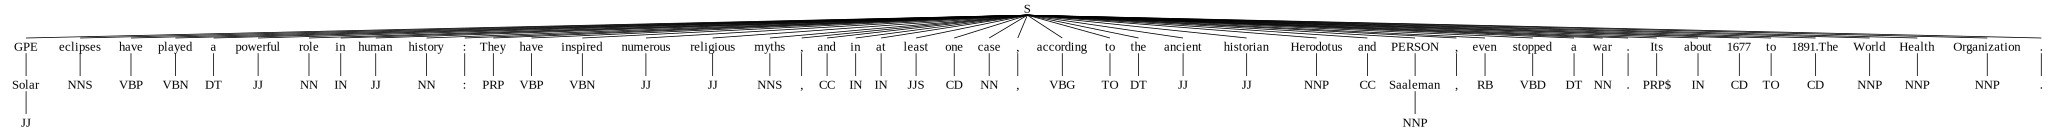

In [69]:
nltk.ne_chunk(tag_elements)

In [75]:
doc='''hello there! My name is Harsha Harod. I live in Pune, India. I workat Microsoft. '''

In [76]:
spacy_large_ner(doc)

{('Harsha Harod', 'PERSON'),
 ('India', 'GPE'),
 ('Microsoft', 'ORG'),
 ('Pune', 'GPE')}

In [78]:
displacy.render(NER(doc),style="ent",jupyter=True)

## Text Preprocessing - 2

Converting input text to vectors

1) **One Hot Encoding:** Not in use


* Finding unique vocabulary/words in the
corpus.
D1: The food is tasty

D2: The food is served hot

The food is tasty served hot

1    0    0   0     0     0

0 1 0 0 0 0

Similarly for all the words...

D1: [[1 0 0 0 0 0,0 1 0 0 0 0 , 0 0 1 0 0 0,0 0 0 1 0 0]]

Why  not used?
* The above matrix is Sparse Matrix (consisting of 0s and 1s).
* No fixed sizeinput
* No sematic meaningis not captured


**2) Bag of words**

Steps:

1) Lower all the words

2) Remove Stopwords


**Vocabulary**   **Frequency**

good ----------->              3

boy -------------->              2

girl --------------->              2

good  boy  girl

2  1  0  ----------> vector

1  0  1

1  1   1

* Binary BOW and  BOW (based on frequency)

**Advantages:**

1)Simple and intuitive

2)Fixed sized I/P: good for  ML for this feature

**Disadvantage:**

1)Sparse matrix or array: Overfitting

2)Ordering of the word is geting changed

3)Out of vocabulary

4)**Semantic meaning** is still not captured






**3) TF-IDF** (Term Frequency - Inverse Document Frequency)

**Advantages:**

1) Intuitive

2) Fixed size, based on vocab size

3) Word importance is getting captured

If a word is present in all the sentences it should be given less importance,less frequent words are valued higher.

**Disadvantage:**

1) Sparsity is exists

2) Out of vocabulary






**Word Embedding**:

In NLP, word embedding is a term used for the representation of words for text analysis, typically in the form of real valued vector that encodes the meaning of the word such that such that the words that are closer in the vector space are expected to be similar in meaning.

If lets say we have 2 vectors ( probably in higher dimension, so here we apply dimension reduction technique to reduce to two dimension)

**Word Embeddings are of two types:**

1) Count  or Frequency: One hot encoding, BOW, TF-IDF

2) Deep Learning trained model: Word2Vec

Word2Vec Architecture:

* CBow
* Skipgram


4) **Word2Vec**: A technique by Google

This algorithm uses neural network model to learn word associations from a large corpus of text. Once trained ,such model can detect synonymous words or suggest additional words for a partial sentence.
It is **supervised learning** technique

**Cosine Similarity**

In this method we have two types of model
* Pretrained Model: Trained by Google on 3 billion parameters
* Train a model from scratch

**CBOW** (Continous Bag of Words)

1) Dataset: Sentences

2)Window size: 5














When to apply CBOW/Skipgram ?
* Small Dataset --> CBOW
* Huge Dataset ---> SkipGram

How to improve CBOW/SkipGram?
* Increase the training data
* Increase the window size

Feature representation of n dimension ( reduced dimension to represent the word in a vector form)

**Average Word2Vec**

We need to get the vector for the sentence / document and not word for classification,we get that vector D1 by taking the average value of all corresponding vector element of D1 word.

### Gensim Library

In [1]:
! pip install gensim

In [2]:
import gensim

In [3]:
from gensim.models import Word2Vec, KeyedVectors

In [4]:
# we will use a google pre trained model

import gensim.downloader as api

wv=api.load('word2vec-google-news-300')
vec_king = wv['king']

# it will be in 300 dimension feature representataion as vector of word 'king'


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
# which is the most similar word in the entire corpus

wv.most_similar('teddy')



[('teddy_bear', 0.6985084414482117),
 ('cuddly_toy', 0.5974318385124207),
 ('teddybear', 0.5605696439743042),
 ('teddies', 0.545166552066803),
 ('romper_suit', 0.5435360670089722),
 ('babygro', 0.537071943283081),
 ('Pudsey_Bear', 0.5300406217575073),
 ('stuffed_animal', 0.5272604823112488),
 ('doll', 0.5216587781906128),
 ('Cuddle_Cat', 0.5186371207237244)]

In [6]:
wv.similarity('tennis','sports')

0.4901051

In [7]:
vec=wv['king'] - wv['man'] + wv['women']

In [9]:
wv.most_similar(vec)

[('king', 0.6478992700576782),
 ('queen', 0.535493791103363),
 ('women', 0.5233659148216248),
 ('kings', 0.5162314772605896),
 ('queens', 0.4995364248752594),
 ('kumaris', 0.49238473176956177),
 ('princes', 0.46233269572257996),
 ('monarch', 0.45280295610427856),
 ('monarchy', 0.4293173849582672),
 ('kings_princes', 0.42342400550842285)]

### Training Word2Vec from scratch

In [10]:
#Converts a documnet into lowercase tokens

from gensim.utils import simple_preprocess

In [ ]:
# change to lowercase using the above function

In [ ]:
# Train the model from scratch by playing with the parameters

model= gensim.models.Word2Vec()


In [ ]:
def avg_word2vec():

  return np.mean([model.wv[word] for word in doc if word in mode.wv.index_to_key], axis=0)





In [ ]:
#apply for all sentences
#word2vec-ML/Dl model????????
